```{contents}
```

# Handle Underfitting/Overfitting

## Handling Overfitting in DTC

1. **Pre-pruning (Early Stopping)**

   * Limit tree complexity:

     * `max_depth` → limit depth of the tree
     * `min_samples_split` → require more samples to split
     * `min_samples_leaf` → require more samples per leaf
     * `max_leaf_nodes` → restrict number of leaves

   ```python
   DecisionTreeClassifier(max_depth=5, min_samples_leaf=4)
   ```

2. **Post-pruning (Cost Complexity Pruning)**

   * Use `ccp_alpha` to prune weak branches.

   ```python
   DecisionTreeClassifier(ccp_alpha=0.01)
   ```

3. **Reduce Noise in Data**

   * Clean data, remove irrelevant features.

4. **Use Ensemble Methods**

   * Random Forests, Gradient Boosting (combine multiple trees).

---

## Handling Underfitting in DTC

1. **Allow More Complexity**

   * Increase depth & allow smaller splits:

   ```python
   DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
   ```

2. **Reduce Pruning Strength**

   * Use smaller `ccp_alpha` (closer to 0).

3. **Feature Engineering**

   * Add better features, encode categorical variables, transformations.

4. **Check Data Quality**

   * Underfitting often means the features don’t explain the target well → improve dataset.

---

**Key Takeaway**

* **Overfitting** → model too complex → **simplify the tree**.
* **Underfitting** → model too simple → **allow more complexity**.
* Best practice: Use **cross-validation** + **hyperparameter tuning** (`GridSearchCV`) to find the sweet spot.


**Overfitting vs Underfitting in DTC**

| Case                | What Happens                                     | Symptoms                                              | Model Behavior      |
| ------------------- | ------------------------------------------------ | ----------------------------------------------------- | ------------------- |
| **Overfitting** 🌳  | Tree is **too complex**, memorizes training data | Very high training accuracy, much lower test accuracy | Poor generalization |
| **Underfitting** 🌱 | Tree is **too simple**, can’t capture patterns   | Both training & test accuracy are low                 | Model is too weak   |

---


=== Decision Tree Performance ===
Underfitting (max_depth=1) → Train: 0.648, Test: 0.711
Overfitting (max_depth=None) → Train: 1.000, Test: 1.000
Balanced (max_depth=3) → Train: 0.952, Test: 1.000


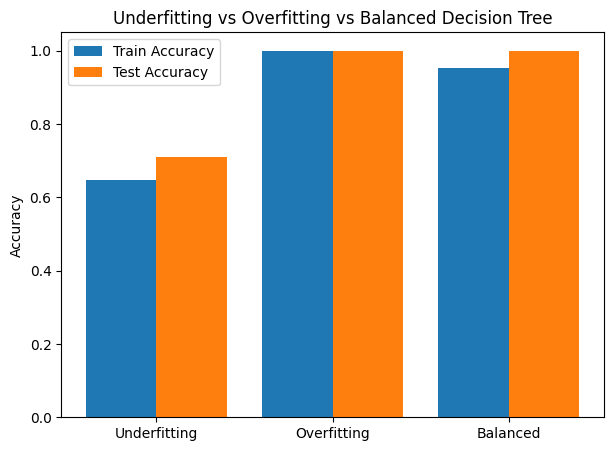

: 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Case 1: Underfitting (shallow tree)
dt_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_underfit.fit(X_train, y_train)
train_acc_underfit = accuracy_score(y_train, dt_underfit.predict(X_train))
test_acc_underfit = accuracy_score(y_test, dt_underfit.predict(X_test))

# Case 2: Overfitting (deep tree, no restriction)
dt_overfit = DecisionTreeClassifier(max_depth=None, random_state=42)
dt_overfit.fit(X_train, y_train)
train_acc_overfit = accuracy_score(y_train, dt_overfit.predict(X_train))
test_acc_overfit = accuracy_score(y_test, dt_overfit.predict(X_test))

# Case 3: Balanced tree (tuned)
dt_balanced = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_balanced.fit(X_train, y_train)
train_acc_balanced = accuracy_score(y_train, dt_balanced.predict(X_train))
test_acc_balanced = accuracy_score(y_test, dt_balanced.predict(X_test))

# Print results
print("=== Decision Tree Performance ===")
print(f"Underfitting (max_depth=1) → Train: {train_acc_underfit:.3f}, Test: {test_acc_underfit:.3f}")
print(f"Overfitting (max_depth=None) → Train: {train_acc_overfit:.3f}, Test: {test_acc_overfit:.3f}")
print(f"Balanced (max_depth=3) → Train: {train_acc_balanced:.3f}, Test: {test_acc_balanced:.3f}")

# Plot results
labels = ["Underfitting", "Overfitting", "Balanced"]
train_scores = [train_acc_underfit, train_acc_overfit, train_acc_balanced]
test_scores = [test_acc_underfit, test_acc_overfit, test_acc_balanced]

x = range(len(labels))
plt.figure(figsize=(7,5))
plt.bar(x, train_scores, width=0.4, label="Train Accuracy", align="center")
plt.bar([i + 0.4 for i in x], test_scores, width=0.4, label="Test Accuracy", align="center")
plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("Accuracy")
plt.title("Underfitting vs Overfitting vs Balanced Decision Tree")
plt.legend()
plt.ylim(0, 1.05)
plt.show()
